In [1]:
# ! pip install lightgbm

## Import Libraries

In [2]:
#import libraries yg dibutuhkan
import pandas as pd #memanggil pandas sebagai pd
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns

from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler  #mamanggil minmaxscaler dari sklearn processing
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #memanggil model encode onehotencoder dari sklearn processing
# from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.utils import shuffle #memanggil shuffle dari sklearn.utils
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.linear_model import LogisticRegression #Memanggil LogisticRegression dari sklearn.linear_model
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors

from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
# from catboost import CatBoostClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# set max column with to none
pd.set_option('display.max_columns', None)

## Import Dataset

In [4]:
df = pd.read_csv('../datasets/clean_data_fix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.2       1291 non-null   int64  
 1   Unnamed: 0.1       1291 non-null   int64  
 2   Unnamed: 0         1291 non-null   int64  
 3   Judul              1291 non-null   object 
 4   Harga              1291 non-null   float64
 5   Lokasi             1291 non-null   object 
 6   Hyperlink          1291 non-null   object 
 7   Img_Hyperlink      1291 non-null   object 
 8   Kamar Tidur        1291 non-null   float64
 9   Kamar Mandi        1291 non-null   float64
 10  Luas Tanah         1291 non-null   int64  
 11  Luas Bangunan      1291 non-null   int64  
 12  Sertifikat         1291 non-null   object 
 13  Daya Listrik       1291 non-null   int64  
 14  Kondisi Perabotan  1163 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 151.4+ KB


In [5]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,Judul,1291
1,Lokasi,7
2,Hyperlink,1289
3,Img_Hyperlink,1289
4,Sertifikat,3
5,Kondisi Perabotan,4


In [6]:
#drop column high cardinality
df.drop(['Judul','Hyperlink','Img_Hyperlink'], axis=1, inplace=True)

In [7]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,Unnamed: 0.2,1291
1,Unnamed: 0.1,1291
2,Unnamed: 0,1291
3,Harga,241
4,Kamar Tidur,15
5,Kamar Mandi,13
6,Luas Tanah,256
7,Luas Bangunan,206
8,Daya Listrik,20


In [8]:
df.drop(['Unnamed: 0.1','Unnamed: 0', 'Unnamed: 0.2'], axis=1, inplace=True)

## Split 

In [9]:
X = df.drop(['Harga'], axis = 1)
y = df['Harga']
X

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan
0,Balikpapan Selatan,5.0,3.0,144,207,SHM - Sertifikat Hak Milik,4400,Semi Furnished
1,Balikpapan Utara,3.0,2.0,534,200,SHM - Sertifikat Hak Milik,2200,Unknown
2,Balikpapan Utara,2.0,2.0,80,140,SHM - Sertifikat Hak Milik,1300,Semi Furnished
3,Balikpapan Tengah,3.0,2.0,201,150,SHM - Sertifikat Hak Milik,1300,Unfurnished
4,Balikpapan Utara,3.0,3.0,120,65,SHM - Sertifikat Hak Milik,2200,Unfurnished
...,...,...,...,...,...,...,...,...
1286,Balikpapan Utara,3.0,2.0,88,105,SHM - Sertifikat Hak Milik,2200,Unknown
1287,Balikpapan Utara,4.0,3.0,200,172,SHM - Sertifikat Hak Milik,2200,Unknown
1288,Balikpapan Utara,3.0,2.0,200,200,SHM - Sertifikat Hak Milik,2200,NaN
1289,Balikpapan Baru,4.0,2.0,520,380,SHM - Sertifikat Hak Milik,6600,Unknown


## Splitting between Train-Set and Test-set

In [10]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (1032, 8)
x Test Size:  (259, 8)
y Train Size:  (1032,)
y Test Size:  (259,)


In [11]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Kamar Tidur,4.499697
1,Kamar Mandi,26.123253
2,Luas Tanah,2.866499
3,Luas Bangunan,3.809100
4,Daya Listrik,3.719770


In [12]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['Kamar Tidur','Kamar Mandi','Luas Tanah','Luas Bangunan','Daya Listrik'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [13]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Kamar Tidur - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


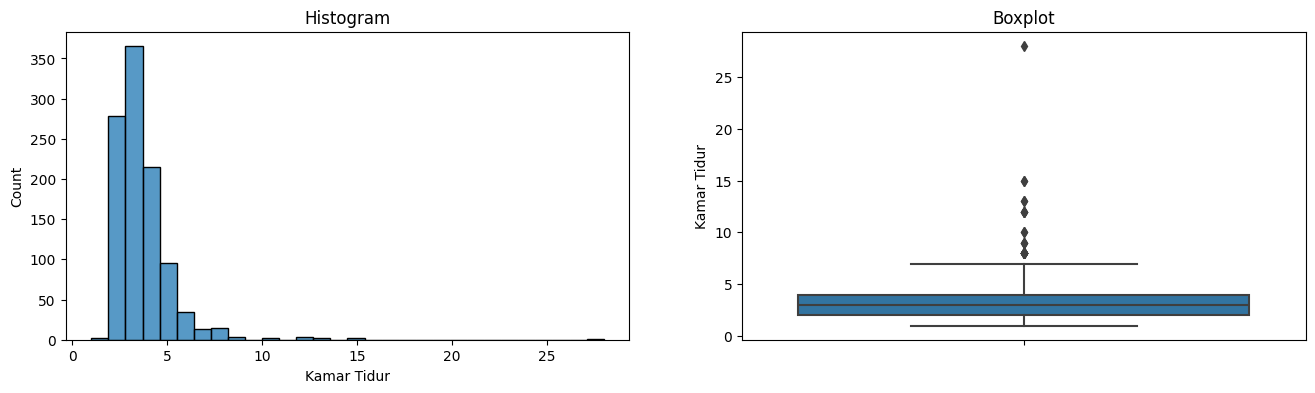


Kamar Tidur - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


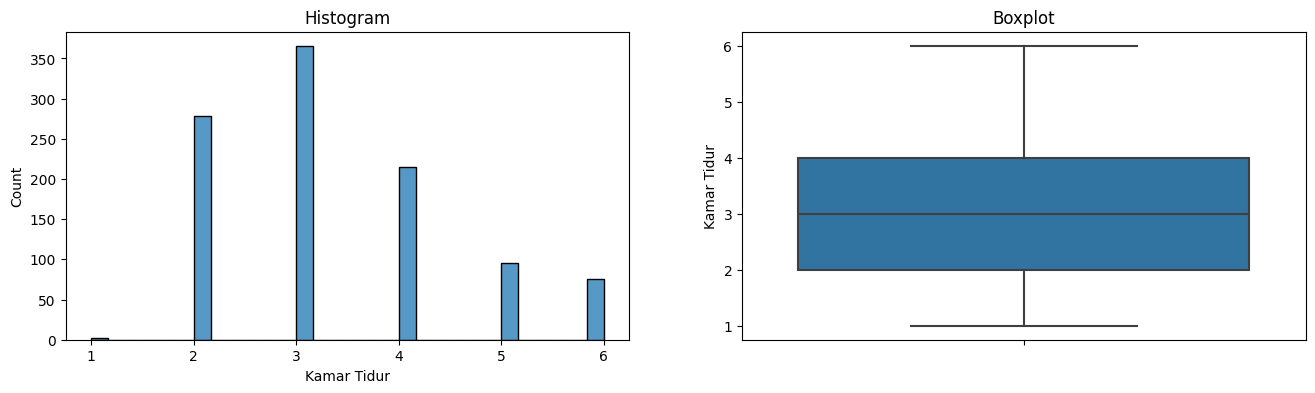

Kamar Mandi - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


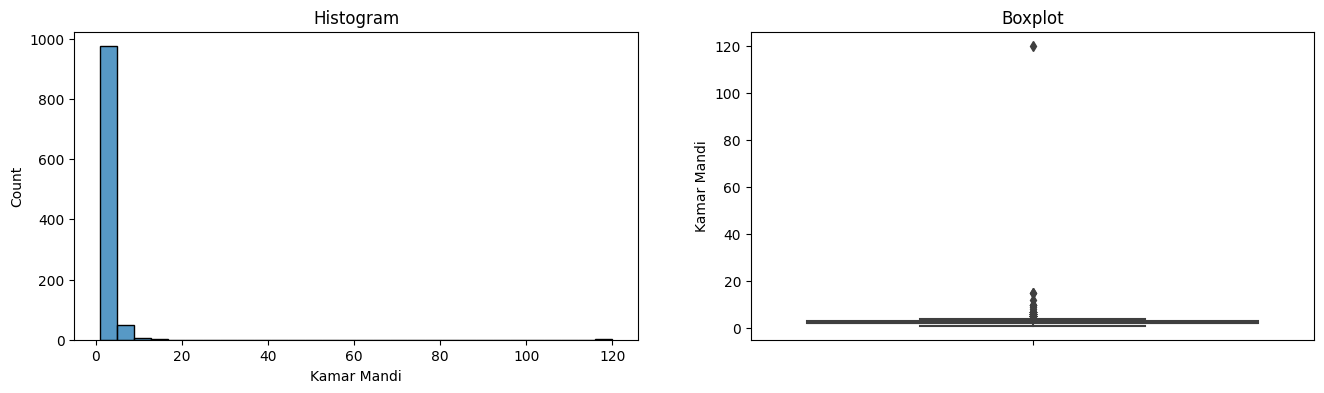


Kamar Mandi - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


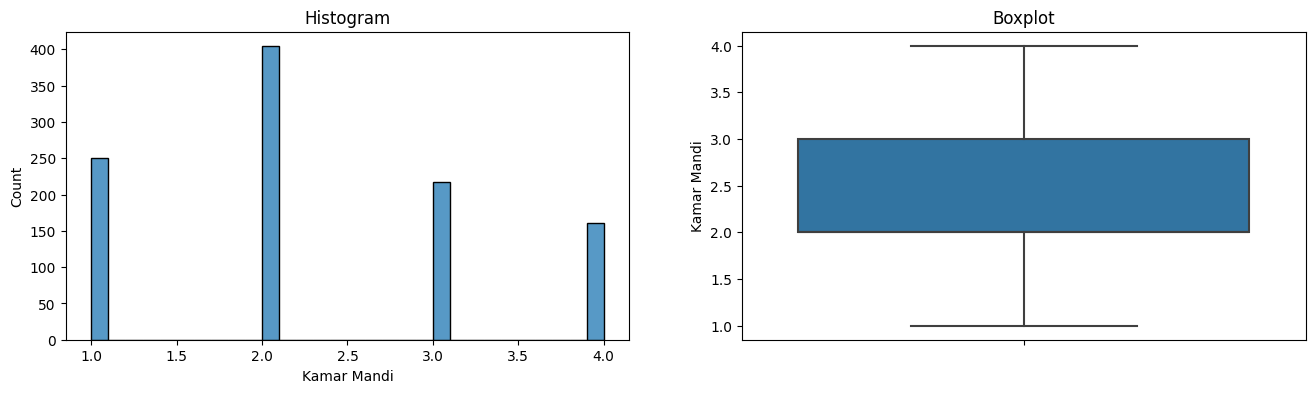

Luas Tanah - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


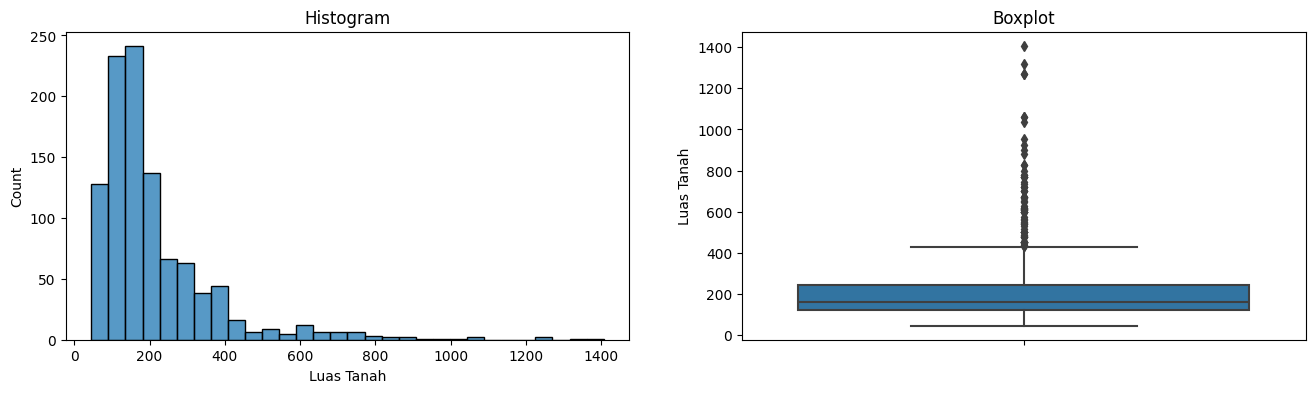


Luas Tanah - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


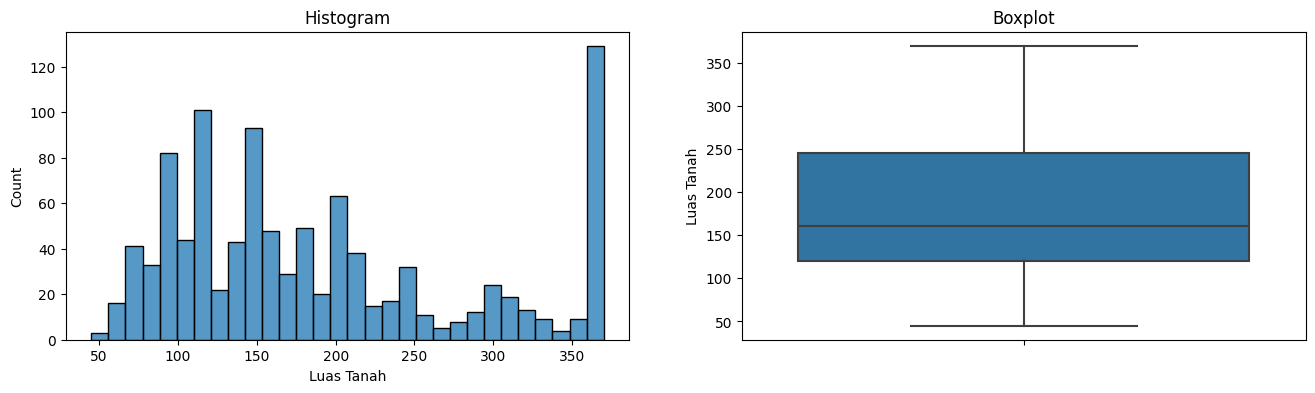

Luas Bangunan - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


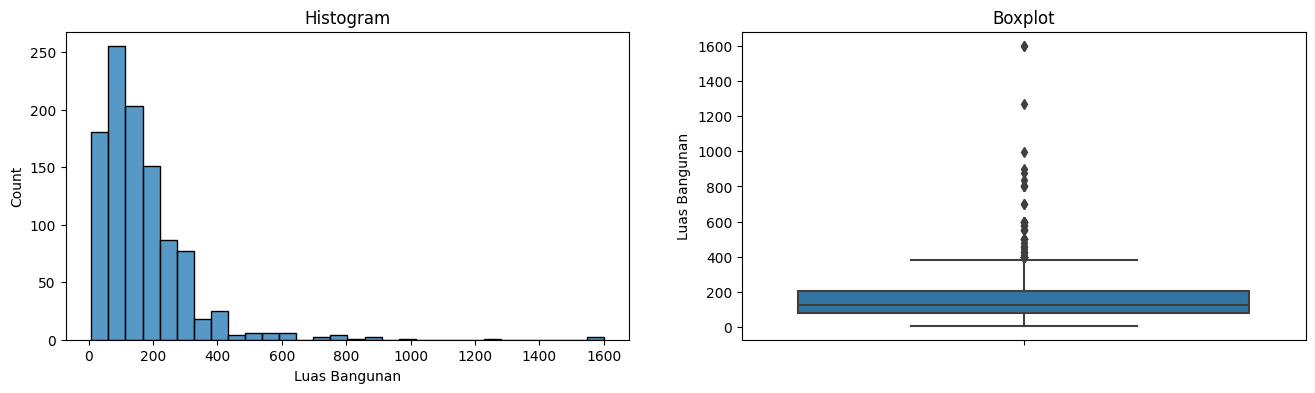


Luas Bangunan - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


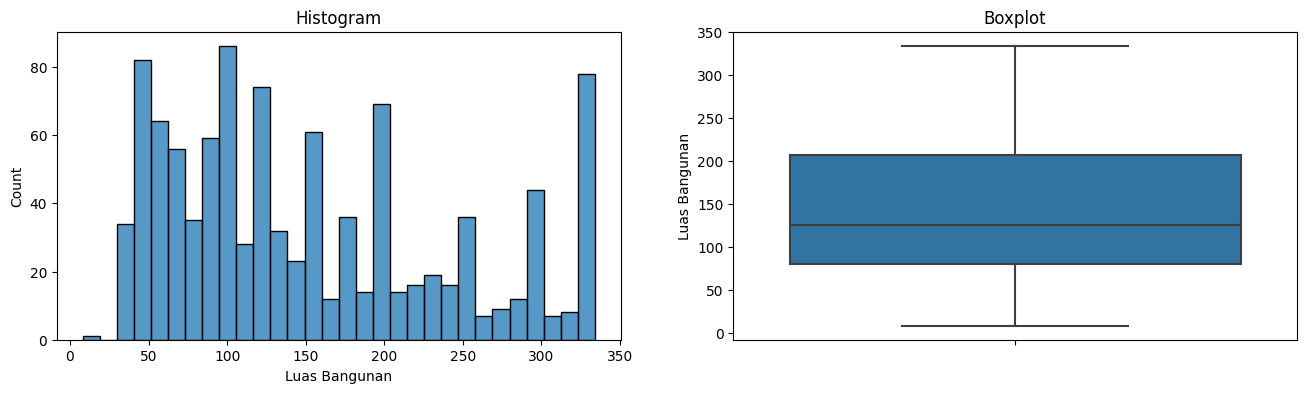

Daya Listrik - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


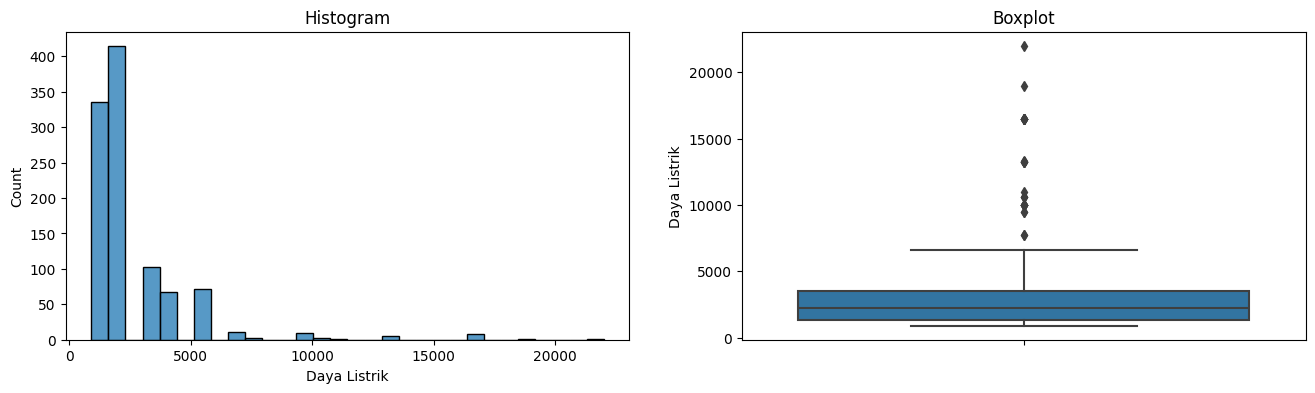


Daya Listrik - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


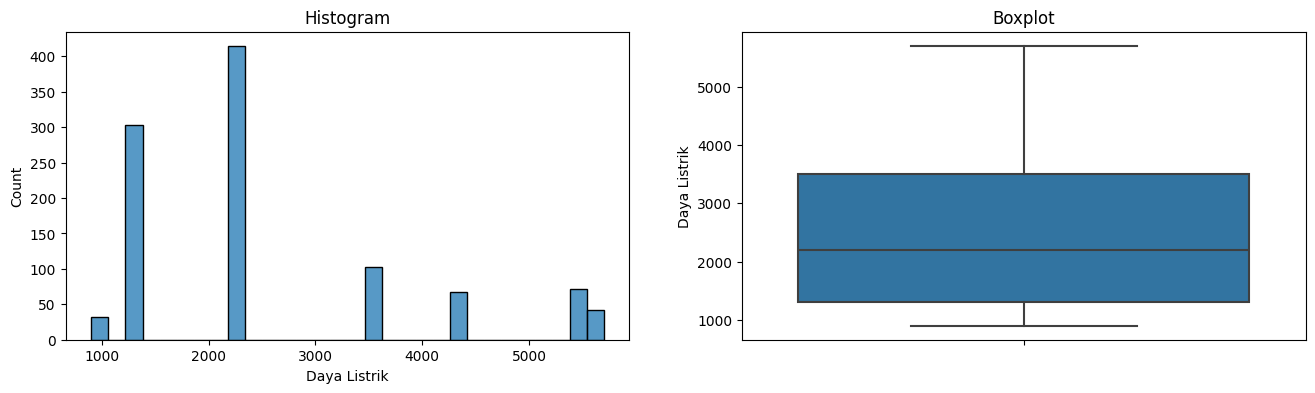

In [14]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

In [15]:
X_test.isnull().sum()

Lokasi                0
Kamar Tidur           0
Kamar Mandi           0
Luas Tanah            0
Luas Bangunan         0
Sertifikat            0
Daya Listrik          0
Kondisi Perabotan    18
dtype: int64

In [16]:
y_train.isnull().sum()

0

In [17]:
X_train

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan
547,Balikpapan Utara,2.0,2.0,60,47,SHM - Sertifikat Hak Milik,1300,Unknown
741,Balikpapan Utara,2.0,1.0,156,100,SHM - Sertifikat Hak Milik,2200,Unknown
3,Balikpapan Tengah,3.0,2.0,201,150,SHM - Sertifikat Hak Milik,1300,Unfurnished
1055,Balikpapan Selatan,5.0,1.0,600,240,SHM - Sertifikat Hak Milik,2200,NaN
577,Balikpapan Selatan,5.0,4.0,192,200,SHM - Sertifikat Hak Milik,1300,Unknown
...,...,...,...,...,...,...,...,...
626,Balikpapan Selatan,2.0,1.0,400,98,SHM - Sertifikat Hak Milik,900,Unfurnished
1016,Balikpapan Utara,3.0,3.0,200,130,SHM - Sertifikat Hak Milik,2200,Unknown
165,Balikpapan Selatan,4.0,3.0,180,180,SHM - Sertifikat Hak Milik,3500,Unknown
7,Balikpapan Utara,6.0,4.0,396,400,SHM - Sertifikat Hak Milik,4400,Semi Furnished


### Split Between Num col and Cat col

In [18]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Daya Listrik']
Categorical Columns:  ['Lokasi', 'Sertifikat', 'Kondisi Perabotan']


In [19]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik
547,2.0,2.0,60,47,1300
741,2.0,1.0,156,100,2200
3,3.0,2.0,201,150,1300
1055,5.0,1.0,600,240,2200
577,5.0,4.0,192,200,1300
...,...,...,...,...,...
626,2.0,1.0,400,98,900
1016,3.0,3.0,200,130,2200
165,4.0,3.0,180,180,3500
7,6.0,4.0,396,400,4400


In [20]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Kamar Tidur,ada korelasi
1,Kamar Mandi,ada korelasi
2,Luas Tanah,ada korelasi
3,Luas Bangunan,ada korelasi
4,Daya Listrik,ada korelasi


In [21]:
# Feature selection Kategorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Lokasi,ada korelasi
1,Sertifikat,ada korelasi
2,Kondisi Perabotan,ga ada korelasi


## Model Definition

In [22]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), selector(dtype_exclude='object')),
    ('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

# #Making pipeline for catboost
# pipe_catboost = Pipeline([
# ('transformer', transformer),
# ('classifier', CatBoostClassifier())
# ])

# Making pipeline for LightGBM
pipe_lgbm = Pipeline([
    # ('transformer', transformer),
    ('classifier', LGBMRegressor(num_leaves=32))
])

# Making pipeline for XGBoost
pipe_xgb = Pipeline([
    # ('transformer', transformer),
    ('classifier', XGBRegressor(n_estimators=3000, max_depth=3))
])

# Making pipeline for Random Forest
pipe_rf = Pipeline([
    # ('transformer', transformer),
    ('classifier', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

# Making pipeline for Linear Regression
pipe_log = Pipeline([
    # ('transformer', transformer),
    ('regressor', LogisticRegression(
        random_state=42
    ))
])

pipe_tree_reg = Pipeline([
    # ('transformer', transformer),  # Uncomment and replace with your transformer
    ('regressor', DecisionTreeRegressor(
        random_state=42,
        max_depth=5,               
        min_samples_split=2        
    ))
])

pipe_svm = Pipeline([
    ('regressor', SVR(
        kernel='rbf',     # Radial Basis Function kernel
        C=1.0,            # Regularization parameter
        epsilon=0.1       # Epsilon parameter in the SVR model
    ))
])

pipe_lasso_reg = Pipeline([
    ('regressor', Lasso(
        alpha=0.5,         # Regularization parameter
        fit_intercept=True, # Fit the intercept or not
        random_state=42    # Seed for reproducibility
    ))
])

pipe_gb_reg = Pipeline([
    ('regressor', GradientBoostingRegressor(
        loss='huber',           # Loss function to be optimized ('ls' for least squares regression)
        learning_rate=0.1,    # Step size shrinkage used to prevent overfitting
        n_estimators=100,     # Number of boosting stages to be run
        max_depth=3,          # Maximum depth of the individual trees
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
        subsample=1.0,        # Fraction of samples used for fitting the trees
        random_state=42 
    ))
])

pipe_ridge = Pipeline([
    ('regressor', Ridge(
        alpha=1.0,         # Regularization strength (L2 penalty term)
        fit_intercept=True, # Fit the intercept or not
        solver='auto',     # Solver to use for fitting the model
        random_state=42    # Seed for reproducibility
    ))
])

pipe_knn_reg = Pipeline([
    # ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('regressor', KNeighborsRegressor(
        n_neighbors=5,     # Number of neighbors to use for kneighbors queries
        weights='uniform', # Weight function used in prediction ('uniform' or 'distance')
        algorithm='auto',  # Algorithm used to compute the nearest neighbors
        p=2,               # Power parameter for Minkowski metric (p=2 for Euclidean distance)
        leaf_size=30       # Leaf size passed to BallTree or KDTree
    ))
])

In [23]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

## FAMD For Multiple Type of Data


In [24]:
# ! pip install prince

In [25]:
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_df

X_test_transformed_df = pd.DataFrame(X_test_transformed)
X_test_transformed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.839387,-0.388255,-0.146854,-0.920631,-0.643370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.443214,0.121191,-0.433472,1.216980,1.205113,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.268736,-0.133532,-0.207837,-0.124266,-0.247266,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.839387,-0.388255,-0.787171,-0.857760,-0.643370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.301914,-0.133532,-0.427374,-0.473549,-0.643370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.839387,-0.388255,-0.573732,-0.543405,-0.643370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255,-0.268736,0.121191,-0.427374,0.225017,0.324883,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
256,0.301914,0.375913,2.170481,0.923582,4.593998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
257,1.443214,0.375913,-0.085872,0.504443,-0.247266,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# from prince import FAMD
# famd = FAMD(n_components =10, n_iter = 3, random_state = 103)

# # Fit and transform X_train_transformed_df, then assign the result to X_train_transformed_2
# X_train_transformed_2 = famd.fit_transform(X_train)
# X_test_transformed_2 = famd.transform(X_test)

In [27]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=15, random_state=101)
# X_train_transformed_2 = pca.fit_transform(X_train_transformed_df)
# X_test_transformed_2 = pca.transform(X_test_transformed)

## Base Model Evaluation

### LGBMRegressor

In [28]:
model_lgbm = pipe_lgbm.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_lgbm.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_lgbm.score(X_test_transformed, y_test),4))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 1032, number of used features: 19
[LightGBM] [Info] Start training from score 1993.222868
Training Score:  0.8187
Testing Score:  0.6608


In [29]:
y_pred_lgbm_train = model_lgbm.predict(X_train_transformed)

y_pred_lgbm_test = model_lgbm.predict(X_test_transformed)

In [30]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_lgbm_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_lgbm_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_lgbm_train)}')

Results for Train Data:
MAE Train : 363.71636307053154
MSE Train : 748708.2564338906
RMSE Train : 865.2792938894878
MAPE Train : 0.23160956977653607


In [31]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_lgbm_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_lgbm_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_lgbm_test)}')

Resutls for Test Data
MAE Test : 587.0583259432113
MSE Test : 1132717.285899374
RMSE Test : 1064.2919176144173
MAPE Test : 0.3458087295520365


### XGBRegressor

In [32]:
model = XGBRegressor()

# define model evaluation method
cv = StratifiedKFold(n_splits=10)
# evaluate model
scores = cross_val_score(model, X_train_transformed, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
# print('Rmse:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

model_xgb = pipe_xgb.fit(X_train_transformed, y_train)

print('Training Score: ', round(pipe_xgb.score(X_train_transformed, y_train), 4))
print('Testing Score: ', round(pipe_xgb.score(X_test_transformed, y_test), 4))

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean MAE: 557.933 (52.614)
Training Score:  0.9991
Testing Score:  0.5026


In [33]:
y_pred_xgb_train = model_xgb.predict(X_train_transformed)

y_pred_xgb_test = model_xgb.predict(X_test_transformed)

In [34]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_xgb_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_xgb_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_xgb_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_xgb_train)}')

Results for Train Data:
MAE Train : 27.013017262599266
MSE Train : 3558.6130364594073
RMSE Train : 59.65411164755877
MAPE Train : 0.03989561048398176


In [35]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_xgb_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_xgb_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_xgb_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_xgb_test)}')

Resutls for Test Data
MAE Test : 592.3206143323979
MSE Test : 1661078.8607247989
RMSE Test : 1288.8284838273862
MAPE Test : 0.40451494901615404


### Random Forest

In [36]:
model_rf = pipe_rf.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_rf.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test_transformed, y_test),4))

Training Score:  0.9677
Testing Score:  0.7319


In [37]:
y_pred_rf_train = model_rf.predict(X_train_transformed)
y_pred_rf_test = model_rf.predict(X_test_transformed)

In [38]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_rf_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_rf_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_rf_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_rf_train)}')

Results for Train Data:
MAE Train : 201.0188186897351
MSE Train : 133555.54456065665
RMSE Train : 365.45252025489805
MAPE Train : 0.14948993140724068


In [39]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_rf_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_rf_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_rf_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_rf_test)}')

Resutls for Test Data
MAE Test : 539.718515547087
MSE Test : 895461.2069393321
RMSE Test : 946.2881204682494
MAPE Test : 0.35245393698671873


### Logistic Reggression

In [40]:
model_log = pipe_log.fit(X_train_transformed, y_train)
print('Training Score: ',round(model_log.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(model_log.score(X_test_transformed, y_test),4))

Training Score:  0.187
Testing Score:  0.0695


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Reggression

In [41]:
model_dt = pipe_tree_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_tree_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_tree_reg.score(X_test_transformed, y_test),4))

Training Score:  0.7915
Testing Score:  0.6425


In [42]:
y_pred_dt_train = model_dt.predict(X_train_transformed)
y_pred_dt_test = model_dt.predict(X_test_transformed)

In [43]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_dt_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_dt_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_dt_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_dt_train)}')

Results for Train Data:
MAE Train : 569.4017312777956
MSE Train : 860740.9545978399
RMSE Train : 927.7612594831926
MAPE Train : 0.39854812939204753


In [44]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_dt_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_dt_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_dt_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_dt_test)}')

Resutls for Test Data
MAE Test : 685.2402705862952
MSE Test : 1193959.479834046
RMSE Test : 1092.6845289625207
MAPE Test : 0.45060640174430855


In [45]:
model_svm = pipe_svm.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_svm.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test_transformed, y_test),4))

Training Score:  -0.0408
Testing Score:  -0.0317


In [46]:
y_pred_svm_train = model_svm.predict(X_train_transformed)
y_pred_svm_test = model_svm.predict(X_test_transformed)

In [47]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_svm_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_svm_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_svm_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_svm_train)}')

Results for Train Data:
MAE Train : 1093.5131713880453
MSE Train : 4297215.95932083
RMSE Train : 2072.972734823309
MAPE Train : 0.6557609852032642


In [48]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_svm_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_svm_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_svm_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_svm_test)}')

Resutls for Test Data
MAE Test : 1069.6966531067242
MSE Test : 3445563.765827866
RMSE Test : 1856.2229838647795
MAPE Test : 0.668951742424761


### Lasso Regression

In [49]:
model_lasso = pipe_lasso_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_lasso_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_lasso_reg.score(X_test_transformed, y_test),4))

Training Score:  0.6996
Testing Score:  0.6887


In [50]:
y_pred_lasso_train = model_lasso.predict(X_train_transformed)
y_pred_lasso_test = model_lasso.predict(X_test_transformed)

In [51]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_lasso_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_lasso_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_lasso_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_lasso_train)}')

Results for Train Data:
MAE Train : 691.4476445824007
MSE Train : 1240417.4641936317
RMSE Train : 1113.740303748424
MAPE Train : 0.4705070285623397


In [52]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_lasso_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_lasso_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_lasso_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_lasso_test)}')

Resutls for Test Data
MAE Test : 627.8407756691297
MSE Test : 1039529.2139556385
RMSE Test : 1019.5730547418553
MAPE Test : 0.4241814125375907


### Gradient Boosting Regression

In [53]:
model_gbr = pipe_gb_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_gb_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_gb_reg.score(X_test_transformed, y_test),4))

Training Score:  0.8644
Testing Score:  0.5883


In [54]:
y_pred_gbr_train = model_gbr.predict(X_train_transformed)
y_pred_gbr_test = model_gbr.predict(X_test_transformed)

In [55]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_gbr_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_gbr_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_gbr_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_gbr_train)}')

Results for Train Data:
MAE Train : 441.76328265636494
MSE Train : 560025.2055991268
RMSE Train : 748.3483183646014
MAPE Train : 0.3105771084003269


In [56]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_gbr_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_gbr_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_gbr_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_gbr_test)}')

Resutls for Test Data
MAE Test : 629.3991856880267
MSE Test : 1374925.7046266617
RMSE Test : 1172.5722598742739
MAPE Test : 0.4149359287960536


### Ridge Regressor

In [57]:
model_ridge = pipe_ridge.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_ridge.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_ridge.score(X_test_transformed, y_test),4))

Training Score:  0.6995
Testing Score:  0.6891


In [58]:
y_pred_ridge_train = model_ridge.predict(X_train_transformed)
y_pred_ridge_test = model_ridge.predict(X_test_transformed)

In [59]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_ridge_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_ridge_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_ridge_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_ridge_train)}')

Results for Train Data:
MAE Train : 691.211195640189
MSE Train : 1240489.1868675505
RMSE Train : 1113.772502294589
MAPE Train : 0.4701952211002501


In [60]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_ridge_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_ridge_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_ridge_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_ridge_test)}')

Resutls for Test Data
MAE Test : 627.3103147454037
MSE Test : 1038212.017809114
RMSE Test : 1018.9268952231627
MAPE Test : 0.42386054808209744


### KNN Regression

In [61]:
model_knn = pipe_knn_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_knn_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_knn_reg.score(X_test_transformed, y_test),4))

Training Score:  0.7415
Testing Score:  0.6624


In [62]:
y_pred_knn_train = model_knn.predict(X_train_transformed)
y_pred_knn_test = model_knn.predict(X_test_transformed)

In [63]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_knn_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_knn_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_knn_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_knn_train)}')

Results for Train Data:
MAE Train : 547.8093023255814
MSE Train : 1067342.2294573642
RMSE Train : 1033.1225626504167
MAPE Train : 0.3438863157691346


In [64]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_knn_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_knn_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_knn_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_knn_test)}')

Resutls for Test Data
MAE Test : 663.0741312741313
MSE Test : 1127427.8043243242
RMSE Test : 1061.8040329195987
MAPE Test : 0.4153254945639129


### CatBoost Regressor

In [65]:
import catboost as cb

In [66]:
# train_dataset = cb.Pool(X_train_transformed, y_train) 
# test_dataset = cb.Pool(X_test_transformed, y_test)

In [67]:
model_cb = cb.CatBoostRegressor(
  loss_function='RMSE')

model_cb.fit(X_train_transformed, y_train, verbose=50)

Learning rate set to 0.041147
0:	learn: 1988.9374567	total: 140ms	remaining: 2m 19s


50:	learn: 1105.5836910	total: 216ms	remaining: 4.02s
100:	learn: 897.0876741	total: 301ms	remaining: 2.68s
150:	learn: 803.3295067	total: 429ms	remaining: 2.41s
200:	learn: 733.6144299	total: 522ms	remaining: 2.08s
250:	learn: 684.4724975	total: 607ms	remaining: 1.81s
300:	learn: 634.4335743	total: 691ms	remaining: 1.6s
350:	learn: 588.7165902	total: 781ms	remaining: 1.44s
400:	learn: 553.5338804	total: 862ms	remaining: 1.29s
450:	learn: 517.7776114	total: 936ms	remaining: 1.14s
500:	learn: 495.4871533	total: 1.01s	remaining: 1.01s
550:	learn: 474.0618923	total: 1.1s	remaining: 897ms
600:	learn: 453.1149971	total: 1.19s	remaining: 792ms
650:	learn: 435.6127431	total: 1.28s	remaining: 689ms
700:	learn: 419.3989626	total: 1.37s	remaining: 584ms
750:	learn: 403.8908223	total: 1.47s	remaining: 487ms
800:	learn: 388.0102895	total: 1.55s	remaining: 385ms
850:	learn: 373.5085467	total: 1.7s	remaining: 297ms
900:	learn: 360.4425719	total: 1.82s	remaining: 200ms
950:	learn: 348.1151877	total: 

In [68]:
y_pred_cb_train = model_cb.predict(X_train_transformed)
y_pred_cb_test = model_cb.predict(X_test_transformed)

In [69]:
print('Training Score: ',round(model_cb.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(model_cb.score(X_test_transformed, y_test),4))

Training Score:  0.9725
Testing Score:  0.7104


In [70]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_cb_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_cb_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_cb_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_cb_train)}')

Results for Train Data:
MAE Train : 250.54052928562248
MSE Train : 113653.11401005826
RMSE Train : 337.12477513534697
MAPE Train : 0.2057845304401438


In [71]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_cb_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_cb_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_cb_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_cb_test)}')

Resutls for Test Data
MAE Test : 550.1813737103022
MSE Test : 967307.371330633
RMSE Test : 983.5178551153166
MAPE Test : 0.3786825530659187


In [72]:
# sorted_feature_importance = model.feature_importances_.argsort()
# plt.barh(boston.feature_names[sorted_feature_importance], 
#         model.feature_importances_[sorted_feature_importance], 
#         color='turquoise')
# plt.xlabel("CatBoost Feature Importance")

## Compare Models

In [73]:
results  = pd.DataFrame({
    'Model': ['LGBM', 'XGB', 'RF', 'Decision Tree', 'SVM', 'Lasso', 'Gradient Boosting', 'Ridge', 'KNN', 'CatBoost'],
    'Training Score': [round(pipe_lgbm.score(X_train_transformed, y_train),4), round(pipe_xgb.score(X_train_transformed, y_train),4), round(pipe_rf.score(X_train_transformed, y_train),4), round(pipe_tree_reg.score(X_train_transformed, y_train),4), round(pipe_svm.score(X_train_transformed, y_train),4), round(pipe_lasso_reg.score(X_train_transformed, y_train),4), round(pipe_gb_reg.score(X_train_transformed, y_train),4), round(pipe_ridge.score(X_train_transformed, y_train),4), round(pipe_knn_reg.score(X_train_transformed, y_train),4), round(model_cb.score(X_train_transformed, y_train),4)],
    'Testing Score': [round(pipe_lgbm.score(X_test_transformed, y_test),4), round(pipe_xgb.score(X_test_transformed, y_test),4), round(pipe_rf.score(X_test_transformed, y_test),4), round(pipe_tree_reg.score(X_test_transformed, y_test),4), round(pipe_svm.score(X_test_transformed, y_test),4), round(pipe_lasso_reg.score(X_test_transformed, y_test),4), round(pipe_gb_reg.score(X_test_transformed, y_test),4), round(pipe_ridge.score(X_test_transformed, y_test),4), round(pipe_knn_reg.score(X_test_transformed, y_test),4), round(model_cb.score(X_test_transformed, y_test),4)],
})

result_train = pd.DataFrame({
    'Model': ['LGBM', 'XGB', 'RF', 'Decision Tree', 'SVM', 'Lasso', 'Gradient Boosting', 'Ridge', 'KNN', 'CatBoost'],
    'MAE': [mean_absolute_error(y_train,y_pred_lgbm_train), mean_absolute_error(y_train,y_pred_xgb_train), mean_absolute_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,y_pred_dt_train), mean_absolute_error(y_train,y_pred_svm_train), mean_absolute_error(y_train,y_pred_lasso_train), mean_absolute_error(y_train,y_pred_gbr_train), mean_absolute_error(y_train,y_pred_ridge_train), mean_absolute_error(y_train,y_pred_knn_train), mean_absolute_error(y_train,y_pred_cb_train)],
    'MSE': [mean_squared_error(y_train,y_pred_lgbm_train), mean_squared_error(y_train,y_pred_xgb_train), mean_squared_error(y_train,y_pred_rf_train), mean_squared_error(y_train,y_pred_dt_train), mean_squared_error(y_train,y_pred_svm_train), mean_squared_error(y_train,y_pred_lasso_train), mean_squared_error(y_train,y_pred_gbr_train), mean_squared_error(y_train,y_pred_ridge_train), mean_squared_error(y_train,y_pred_knn_train), mean_squared_error(y_train,y_pred_cb_train)],
    'RMSE': [np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train)), np.sqrt(mean_squared_error(y_train,y_pred_xgb_train)), np.sqrt(mean_squared_error(y_train,y_pred_rf_train)), np.sqrt(mean_squared_error(y_train,y_pred_dt_train)), np.sqrt(mean_squared_error(y_train,y_pred_svm_train)), np.sqrt(mean_squared_error(y_train,y_pred_lasso_train)), np.sqrt(mean_squared_error(y_train,y_pred_gbr_train)), np.sqrt(mean_squared_error(y_train,y_pred_ridge_train)), np.sqrt(mean_squared_error(y_train,y_pred_knn_train)), np.sqrt(mean_squared_error(y_train,y_pred_cb_train))],
    'MAPE': [mean_absolute_percentage_error(y_train,y_pred_lgbm_train), mean_absolute_percentage_error(y_train,y_pred_xgb_train), mean_absolute_percentage_error(y_train,y_pred_rf_train), mean_absolute_percentage_error(y_train,y_pred_dt_train), mean_absolute_percentage_error(y_train,y_pred_svm_train), mean_absolute_percentage_error(y_train,y_pred_lasso_train), mean_absolute_percentage_error(y_train,y_pred_gbr_train), mean_absolute_percentage_error(y_train,y_pred_ridge_train), mean_absolute_percentage_error(y_train,y_pred_knn_train), mean_absolute_percentage_error(y_train,y_pred_cb_train)]
})

result_test = pd.DataFrame({
    'Model': ['LGBM', 'XGB', 'RF', 'Decision Tree', 'SVM', 'Lasso', 'Gradient Boosting', 'Ridge', 'KNN', 'CatBoost'],
    'MAE': [mean_absolute_error(y_test,y_pred_lgbm_test), mean_absolute_error(y_test,y_pred_xgb_test), mean_absolute_error(y_test,y_pred_rf_test), mean_absolute_error(y_test,y_pred_dt_test), mean_absolute_error(y_test,y_pred_svm_test), mean_absolute_error(y_test,y_pred_lasso_test), mean_absolute_error(y_test,y_pred_gbr_test), mean_absolute_error(y_test,y_pred_ridge_test), mean_absolute_error(y_test,y_pred_knn_test), mean_absolute_error(y_test,y_pred_cb_test)],
    'MSE': [mean_squared_error(y_test,y_pred_lgbm_test), mean_squared_error(y_test,y_pred_xgb_test), mean_squared_error(y_test,y_pred_rf_test), mean_squared_error(y_test,y_pred_dt_test), mean_squared_error(y_test,y_pred_svm_test), mean_squared_error(y_test,y_pred_lasso_test), mean_squared_error(y_test,y_pred_gbr_test), mean_squared_error(y_test,y_pred_ridge_test), mean_squared_error(y_test,y_pred_knn_test), mean_squared_error(y_test,y_pred_cb_test)],
    'RMSE': [np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test)), np.sqrt(mean_squared_error(y_test,y_pred_xgb_test)), np.sqrt(mean_squared_error(y_test,y_pred_rf_test)), np.sqrt(mean_squared_error(y_test,y_pred_dt_test)), np.sqrt(mean_squared_error(y_test,y_pred_svm_test)), np.sqrt(mean_squared_error(y_test,y_pred_lasso_test)), np.sqrt(mean_squared_error(y_test,y_pred_gbr_test)), np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)), np.sqrt(mean_squared_error(y_test,y_pred_knn_test)), np.sqrt(mean_squared_error(y_test,y_pred_cb_test))],
    'MAPE': [mean_absolute_percentage_error(y_test,y_pred_lgbm_test), mean_absolute_percentage_error(y_test,y_pred_xgb_test), mean_absolute_percentage_error(y_test,y_pred_rf_test), mean_absolute_percentage_error(y_test,y_pred_dt_test), mean_absolute_percentage_error(y_test,y_pred_svm_test), mean_absolute_percentage_error(y_test,y_pred_lasso_test), mean_absolute_percentage_error(y_test,y_pred_gbr_test), mean_absolute_percentage_error(y_test,y_pred_ridge_test), mean_absolute_percentage_error(y_test,y_pred_knn_test), mean_absolute_percentage_error(y_test,y_pred_cb_test)]
})


In [74]:
results

,Model,Training Score,Testing Score
0,LGBM,0.8187,0.6608
1,XGB,0.9991,0.5026
2,RF,0.9677,0.7319
3,Decision Tree,0.7915,0.6425
4,SVM,-0.0408,-0.0317
5,Lasso,0.6996,0.6887
6,Gradient Boosting,0.8644,0.5883
7,Ridge,0.6995,0.6891
8,KNN,0.7415,0.6624
9,CatBoost,0.9725,0.7104


In [75]:
result_train

,Model,MAE,MSE,RMSE,MAPE
0,LGBM,363.716363,7.487083e+05,865.279294,0.231610
1,XGB,27.013017,3.558613e+03,59.654112,0.039896
2,RF,201.018819,1.335555e+05,365.452520,0.149490
3,Decision Tree,569.401731,8.607410e+05,927.761259,0.398548
4,SVM,1093.513171,4.297216e+06,2072.972735,0.655761
5,Lasso,691.447645,1.240417e+06,1113.740304,0.470507
6,Gradient Boosting,441.763283,5.600252e+05,748.348318,0.310577
7,Ridge,691.211196,1.240489e+06,1113.772502,0.470195
8,KNN,547.809302,1.067342e+06,1033.122563,0.343886
9,CatBoost,250.540529,1.136531e+05,337.124775,0.205785


In [76]:
result_test

,Model,MAE,MSE,RMSE,MAPE
0,LGBM,587.058326,1.132717e+06,1064.291918,0.345809
1,XGB,592.320614,1.661079e+06,1288.828484,0.404515
2,RF,539.718516,8.954612e+05,946.288120,0.352454
3,Decision Tree,685.240271,1.193959e+06,1092.684529,0.450606
4,SVM,1069.696653,3.445564e+06,1856.222984,0.668952
5,Lasso,627.840776,1.039529e+06,1019.573055,0.424181
6,Gradient Boosting,629.399186,1.374926e+06,1172.572260,0.414936
7,Ridge,627.310315,1.038212e+06,1018.926895,0.423861
8,KNN,663.074131,1.127428e+06,1061.804033,0.415325
9,CatBoost,550.181374,9.673074e+05,983.517855,0.378683


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


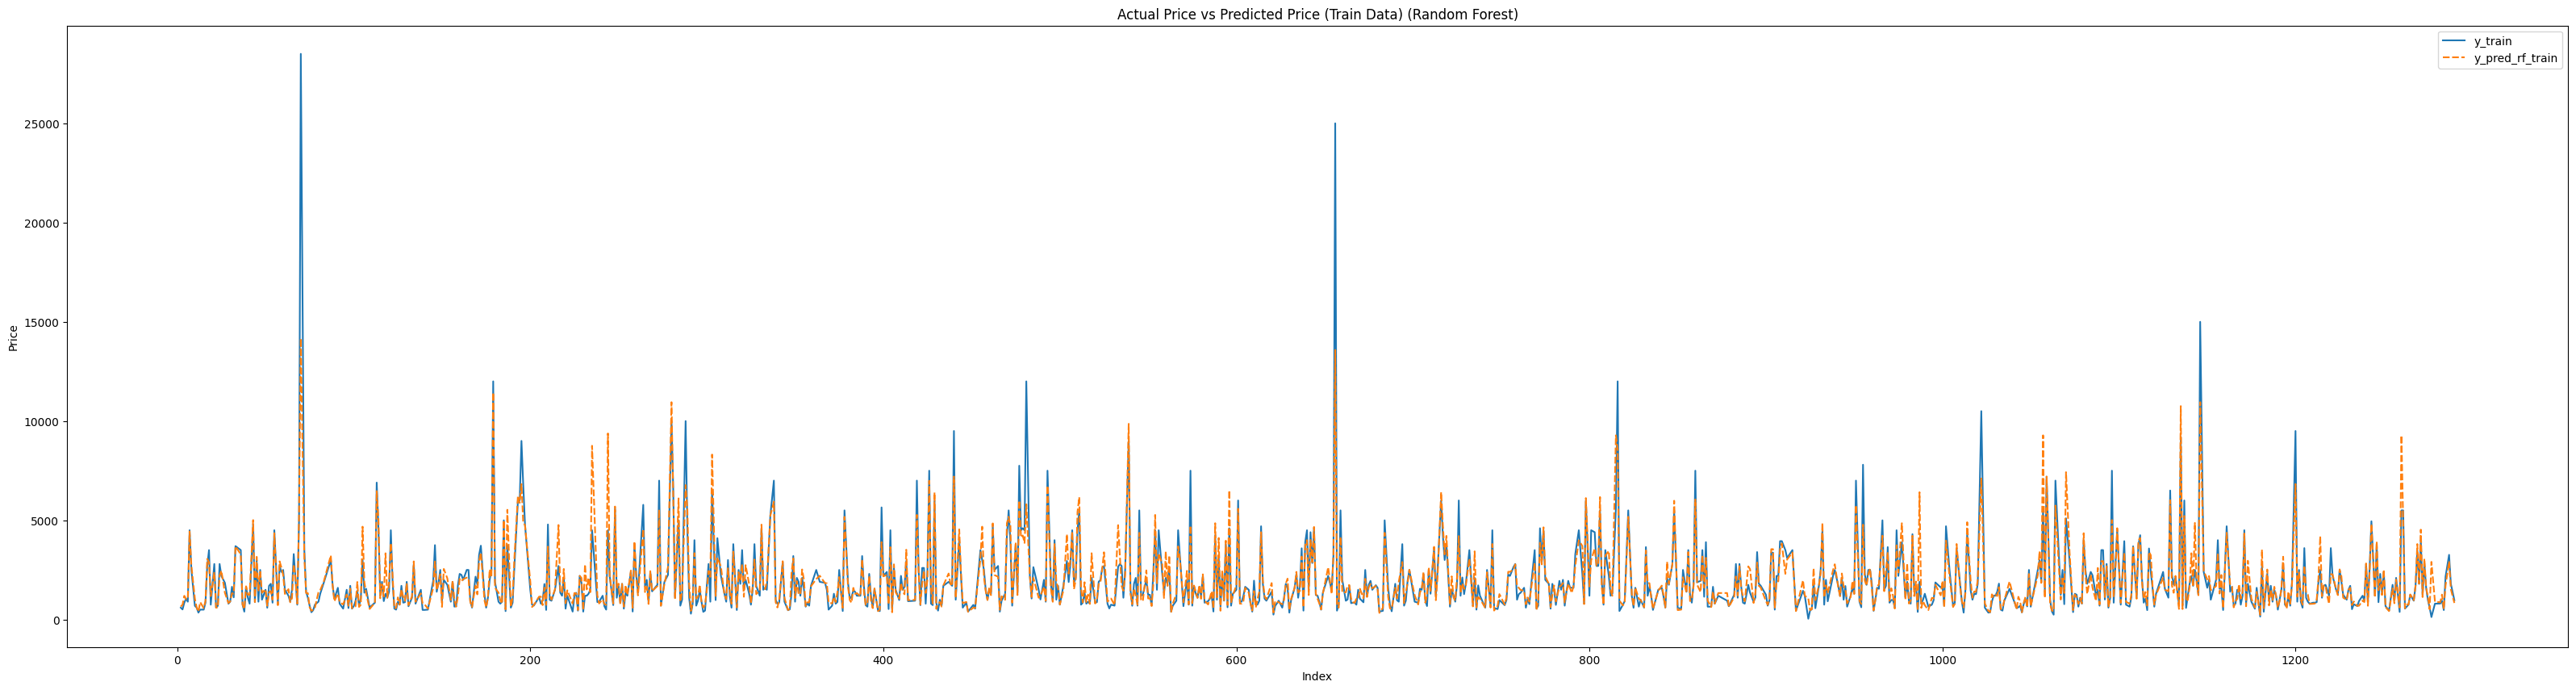

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


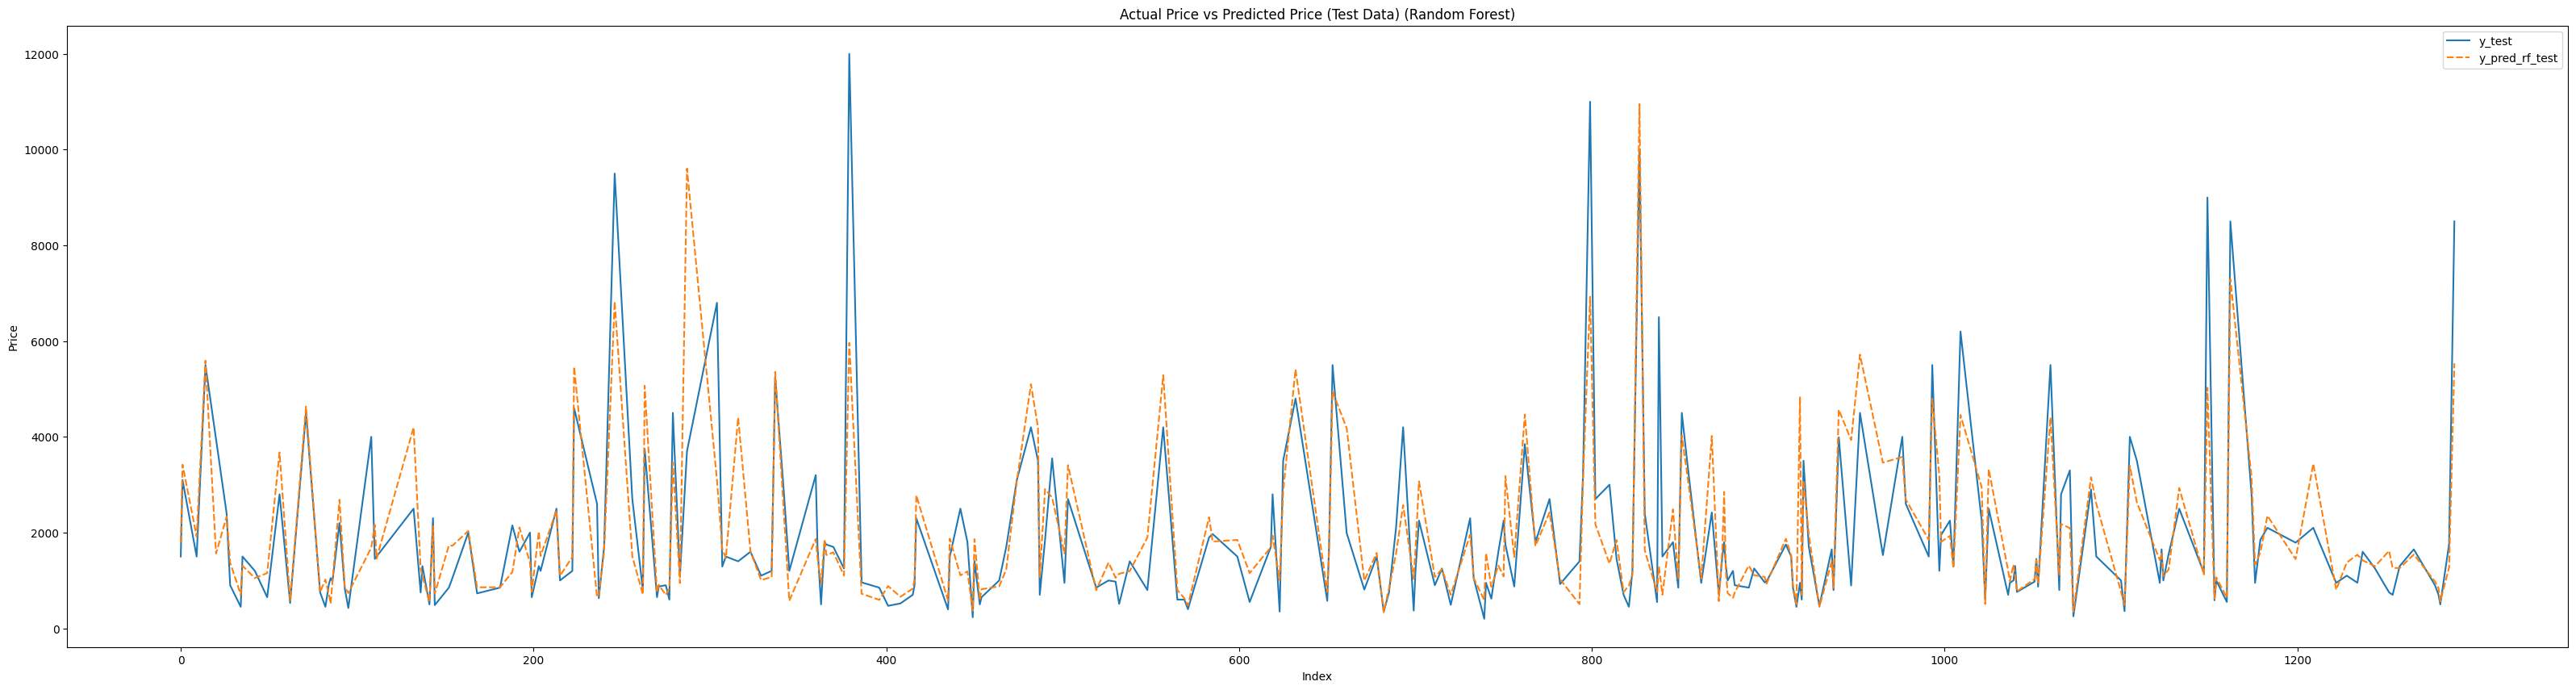

In [77]:
# visualize the y_train and y_train_pred to line chart

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_train':y_train, 'y_pred_rf_train':y_pred_lgbm_train}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Train Data) (Random Forest)')
plt.show()

# visualize the y_test and y_test_pred

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_test':y_test, 'y_pred_rf_test':y_pred_lgbm_test}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Test Data) (Random Forest)')
plt.show()



## Param Tuning

### Random Forest Hyperparameter Tuning

In [78]:
##Parameter Tuning

param_rf = {
    'n_estimators': [10, 25, 50, 75, 100],  
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [79]:
# grid_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_rf.fit(X_train_transformed, y_train)

In [80]:
# grid_rf.best_params_

In [81]:
# use best parameters
model_rf_tuned = RandomForestRegressor(
    n_estimators=50,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# fit the model
model_rf_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_rf_tuned_train = model_rf_tuned.predict(X_train_transformed)
y_pred_rf_tuned_test = model_rf_tuned.predict(X_test_transformed)

# compile all result in a dataframe

results_rf_tuned = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest Tuned'],
    'Training Score': [model_rf.score(X_train_transformed, y_train), model_rf_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_rf.score(X_test_transformed, y_test), model_rf_tuned.score(X_test_transformed, y_test)],
   })

results_rf_tuned

# print('Results for Train Data:')
# print(f'MAE Train : {mean_absolute_error(y_train,y_pred_rf_tuned_train)}')
# print(f'MSE Train : {mean_squared_error(y_train,y_pred_rf_tuned_train)}')
# print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_rf_tuned_train))}')
# print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_rf_tuned_train)}')

# print('Resutls for Test Data')
# print(f'MAE Test : {mean_absolute_error(y_test,y_pred_rf_tuned_test)}')
# print(f'MSE Test : {mean_squared_error(y_test,y_pred_rf_tuned_test)}')
# print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_rf_tuned_test))}')
# print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_rf_tuned_test)}')

,Model,Training Score,Testing Score
0,Random Forest,0.967651,0.731864
1,Random Forest Tuned,0.966509,0.720140


### LightGBM Hyperparameter Tuning

In [82]:
param_lgbm = {
    'num_leaves': [20, 30, 40, 50],  
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [83]:
# grid_lgbm = GridSearchCV(LGBMRegressor(), param_lgbm, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_lgbm.fit(X_train_transformed, y_train)

In [84]:
# grid_lgbm.best_params_

In [85]:
# use best parameters
model_lgbm_tuned = LGBMRegressor(
    num_leaves=30,
    n_estimators=300,
    max_depth=15,
    learning_rate=0.1
)

# fit the model
model_lgbm_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_lgbm_tuned_train = model_lgbm_tuned.predict(X_train_transformed)
y_pred_lgbm_tuned_test = model_lgbm_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_lgbm_tuned = pd.DataFrame({
    'Model': ['LightGBM', 'LightGBM Tuned'],
    'Training Score': [model_lgbm.score(X_train_transformed, y_train), model_lgbm_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_lgbm.score(X_test_transformed, y_test), model_lgbm_tuned.score(X_test_transformed, y_test)],
   })

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 1032, number of used features: 19
[LightGBM] [Info] Start training from score 1993.222868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [86]:
results_lgbm_tuned

,Model,Training Score,Testing Score
0,LightGBM,0.818654,0.660820
1,LightGBM Tuned,0.904050,0.583363


### XGBoost Hyperparameter Tuning

In [87]:
param_xgb = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [88]:
# grid_xgb = GridSearchCV(XGBRegressor(), param_xgb, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_xgb.fit(X_train_transformed, y_train)

In [89]:
# grid_xgb.best_params_

In [90]:
# use best parameters
model_xgb_tuned = XGBRegressor(
    
    reg_lambda = 0.072,
    reg_alpha = 0.8,
    n_estimators=110,
    max_depth=3,
    learning_rate=0.1,
    subsample = 0.911,
    random_state = 12,
    eval_metric = 'auc'
    
)

# fit the model
model_xgb_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_xgb_tuned_train = model_xgb_tuned.predict(X_train_transformed)
y_pred_xgb_tuned_test = model_xgb_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_xgb_tuned = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost Tuned'],
    'Training Score': [model_xgb.score(X_train_transformed, y_train), model_xgb_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_xgb.score(X_test_transformed, y_test), model_xgb_tuned.score(X_test_transformed, y_test)],
   })
results_xgb_tuned

,Model,Training Score,Testing Score
0,XGBoost,0.999138,0.502608
1,XGBoost Tuned,0.913067,0.649984


### Decision Tree Hyperparamter Tunning

In [91]:
# use best parameters
model_dt_tuned = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# fit the tuned model
model_dt_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_dt_tuned_train = model_dt_tuned.predict(X_train_transformed)
y_pred_dt_tuned_test = model_dt_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_dt_tuned = pd.DataFrame({
    'Model': ['Decision Tree', 'Decision Tree Tuned'],
    'Training Score': [model_dt.score(X_train_transformed, y_train), model_dt_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_dt.score(X_test_transformed, y_test), model_dt_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_dt_tuned

,Model,Training Score,Testing Score
0,Decision Tree,0.791519,0.642482
1,Decision Tree Tuned,0.747482,0.009790


### Lasso Regression Hyper Parameter Tunning

In [92]:
# use best parameters
model_lasso_tuned = Lasso(
    alpha=34,         # Regularization parameter
    fit_intercept=True, # Fit the intercept or not
    random_state=42    # Seed for reproducibility
)

# fit the tuned model
model_lasso_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_lasso_tuned_train = model_lasso_tuned.predict(X_train_transformed)
y_pred_lasso_tuned_test = model_lasso_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_lasso_tuned = pd.DataFrame({
    'Model': ['Lasso Regression', 'Lasso Regression Tuned'],
    'Training Score': [model_lasso.score(X_train_transformed, y_train), model_lasso_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_lasso.score(X_test_transformed, y_test), model_lasso_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_lasso_tuned

,Model,Training Score,Testing Score
0,Lasso Regression,0.699556,0.688725
1,Lasso Regression Tuned,0.681890,0.671351


### Gradient Boosting Regression

In [93]:
# use best parameters
model_gbr_tuned = GradientBoostingRegressor(
    loss='huber',           # Loss function to be optimized ('ls' for least squares regression)
    learning_rate=0.1,    # Step size shrinkage used to prevent overfitting
    n_estimators=110,     # Number of boosting stages to be run
    max_depth=3,          # Maximum depth of the individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    subsample=0.911,        # Fraction of samples used for fitting the trees
    random_state=42,
    max_features = 'log2',
)

# fit the tuned model
model_gbr_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_gbr_tuned_train = model_gbr_tuned.predict(X_train_transformed)
y_pred_gbr_tuned_test = model_gbr_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_gbr_tuned = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor', 'Gradient Boosting Regressor Tuned'],
    'Training Score': [model_gbr.score(X_train_transformed, y_train), model_gbr_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_gbr.score(X_test_transformed, y_test), model_gbr_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_gbr_tuned

,Model,Training Score,Testing Score
0,Gradient Boosting Regressor,0.864355,0.588294
1,Gradient Boosting Regressor Tuned,0.856528,0.710098


### CatBoost Hyperparameter Tunning

In [94]:
param_cb = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [95]:
# grid_cb = GridSearchCV(cb.CatBoostRegressor(), param_cb, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_cb.fit(X_train_transformed, y_train)

In [96]:
# grid_cb.best_params_

In [97]:
# use best parameters
model_cb_tuned = cb.CatBoostRegressor(
    iterations=150,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    loss_function='RMSE'
)

# fit the tuned model
model_cb_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_cb_tuned_train = model_cb_tuned.predict(X_train_transformed)
y_pred_cb_tuned_test = model_cb_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_cb_tuned = pd.DataFrame({
    'Model': ['CatBoost Regressor', 'CatBoost Regressor Tuned'],
    'Training Score': [model_cb.score(X_train_transformed, y_train), model_cb_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_cb.score(X_test_transformed, y_test), model_cb_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_cb_tuned

0:	learn: 1928.5884903	total: 1.63ms	remaining: 243ms
1:	learn: 1845.8707700	total: 4.12ms	remaining: 305ms
2:	learn: 1766.0892447	total: 6.87ms	remaining: 337ms
3:	learn: 1694.9877169	total: 8.34ms	remaining: 304ms
4:	learn: 1628.7186467	total: 9.72ms	remaining: 282ms
5:	learn: 1563.7409407	total: 11.2ms	remaining: 269ms
6:	learn: 1509.6820050	total: 12.8ms	remaining: 262ms
7:	learn: 1459.2697122	total: 14.6ms	remaining: 259ms
8:	learn: 1416.4509832	total: 16.1ms	remaining: 253ms
9:	learn: 1379.0227457	total: 23.3ms	remaining: 327ms
10:	learn: 1340.9054674	total: 25ms	remaining: 316ms
11:	learn: 1304.2563722	total: 26.5ms	remaining: 304ms
12:	learn: 1273.0225245	total: 27.9ms	remaining: 294ms
13:	learn: 1244.0809906	total: 29.4ms	remaining: 285ms
14:	learn: 1214.1218888	total: 30.8ms	remaining: 278ms
15:	learn: 1191.1162359	total: 32.6ms	remaining: 273ms
16:	learn: 1169.7188872	total: 34.6ms	remaining: 271ms
17:	learn: 1148.4129176	total: 36.9ms	remaining: 270ms
18:	learn: 1133.077977

107:	learn: 664.5172019	total: 189ms	remaining: 73.3ms
108:	learn: 662.1856148	total: 191ms	remaining: 72ms
109:	learn: 659.5488210	total: 193ms	remaining: 70.2ms
110:	learn: 657.0963409	total: 195ms	remaining: 68.5ms
111:	learn: 653.8971119	total: 196ms	remaining: 66.6ms
112:	learn: 652.2762864	total: 198ms	remaining: 65ms
113:	learn: 650.7822801	total: 200ms	remaining: 63.3ms
114:	learn: 649.2259322	total: 202ms	remaining: 61.5ms
115:	learn: 648.3778972	total: 203ms	remaining: 59.5ms
116:	learn: 645.4166278	total: 204ms	remaining: 57.7ms
117:	learn: 643.9232074	total: 206ms	remaining: 55.9ms
118:	learn: 642.1480280	total: 208ms	remaining: 54.1ms
119:	learn: 639.2836781	total: 209ms	remaining: 52.3ms
120:	learn: 637.5537835	total: 211ms	remaining: 50.5ms
121:	learn: 635.2112245	total: 212ms	remaining: 48.7ms
122:	learn: 632.5912594	total: 214ms	remaining: 46.9ms
123:	learn: 630.7768218	total: 216ms	remaining: 45.3ms
124:	learn: 629.0195904	total: 218ms	remaining: 43.6ms
125:	learn: 62

,Model,Training Score,Testing Score
0,CatBoost Regressor,0.972472,0.710351
1,CatBoost Regressor Tuned,0.919971,0.692399


## EDA for checking on the missprediction

In [98]:
# check for missprediction with more than 30% error in random forest

miss_pred_rf = X_test.copy()
miss_pred_rf['actual'] = y_test
miss_pred_rf['predicted'] = y_pred_rf_test
miss_pred_rf['error'] = abs(miss_pred_rf['actual'] - miss_pred_rf['predicted'])
miss_pred_rf['error_percentage'] = (miss_pred_rf['error'] / miss_pred_rf['actual']) * 100

miss_pred_rf[miss_pred_rf['error_percentage'] > 30]

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan,actual,predicted,error,error_percentage
739,Balikpapan Selatan,2.0,1.0,190,36,HGB - Hak Guna Bangunan,1300,Unknown,200.0,856.250000,656.250000,328.125000
1237,Balikpapan Tengah,3.0,2.0,165,64,SHM - Sertifikat Hak Milik,1300,Semi Furnished,1600.0,1064.475000,535.525000,33.470313
565,Balikpapan Selatan,3.0,2.0,150,130,SHM - Sertifikat Hak Milik,1300,Unfurnished,600.0,900.790000,300.790000,50.131667
532,Balikpapan Selatan,3.0,2.0,120,100,SHM - Sertifikat Hak Milik,2200,Unknown,510.0,1104.008333,594.008333,116.472222
28,Balikpapan Timur,3.0,2.0,404,150,SHM - Sertifikat Hak Milik,1300,Unknown,900.0,1474.466667,574.466667,63.829630
...,...,...,...,...,...,...,...,...,...,...,...,...
442,Balikpapan Kota,6.0,2.0,128,120,SHM - Sertifikat Hak Milik,2200,Unknown,2500.0,1182.225000,1317.775000,52.711000
880,Balikpapan Selatan,2.0,1.0,120,90,HGB - Hak Guna Bangunan,1300,Unknown,1200.0,658.933333,541.066667,45.088889
1252,Balikpapan Utara,3.0,3.0,144,200,SHM - Sertifikat Hak Milik,3500,Unknown,750.0,1091.600000,341.600000,45.546667
1149,Balikpapan Selatan,4.0,4.0,570,300,SHM - Sertifikat Hak Milik,13200,Unknown,9000.0,5550.500000,3449.500000,38.327778


In [99]:
# count by area
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Lokasi'].value_counts()

Lokasi
Balikpapan Selatan    35
Balikpapan Utara      28
Balikpapan Tengah     14
Balikpapan Timur       7
Balikpapan Kota        6
Balikpapan Baru        3
Balikpapan Barat       2
Name: count, dtype: int64

In [100]:
# count by Kamar Tidur
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Kamar Tidur'].value_counts()

Kamar Tidur
3.0     37
2.0     29
4.0     15
5.0      4
6.0      4
8.0      3
7.0      2
11.0     1
Name: count, dtype: int64

In [101]:
# count by Kamar Mandi
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Kamar Mandi'].value_counts()

Kamar Mandi
2.0    46
1.0    24
3.0    13
4.0     8
6.0     2
5.0     1
8.0     1
Name: count, dtype: int64

In [102]:
# count by Luas Tanah
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Luas Tanah'].value_counts()

Luas Tanah
120    8
150    5
180    5
201    3
72     3
      ..
235    1
500    1
204    1
74     1
300    1
Name: count, Length: 64, dtype: int64

In [103]:
# count by Luas Bangunan
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Luas Bangunan'].value_counts()

Luas Bangunan
100    6
90     6
120    6
200    5
150    4
240    3
160    3
36     2
85     2
74     2
380    2
300    2
92     2
50     2
86     2
180    2
130    2
110    2
80     2
109    2
42     1
117    1
201    1
298    1
30     1
155    1
210    1
176    1
307    1
260    1
96     1
220    1
230    1
40     1
47     1
550    1
55     1
72     1
224    1
54     1
108    1
78     1
60     1
225    1
429    1
182    1
288    1
64     1
125    1
250    1
450    1
560    1
38     1
270    1
45     1
308    1
Name: count, dtype: int64

In [104]:
# count by Daya Listrik
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Daya Listrik'].value_counts()

Daya Listrik
2200     40
1300     26
3500      6
4400      6
900       6
6600      3
5500      2
3300      2
16500     1
10600     1
7600      1
13200     1
Name: count, dtype: int64

In [105]:
# count by Sertifikat
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Sertifikat'].value_counts()

Sertifikat
SHM - Sertifikat Hak Milik    79
HGB - Hak Guna Bangunan       16
Name: count, dtype: int64